In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
sns.set(style='whitegrid', context='notebook')

In [71]:
df_data = pd.read_csv('../datas/heart.csv', sep=',')
df_data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [72]:
#valore de la columna target
df_data['target'].unique()

array([0, 1])

In [73]:
#verificando valores nulos
df_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

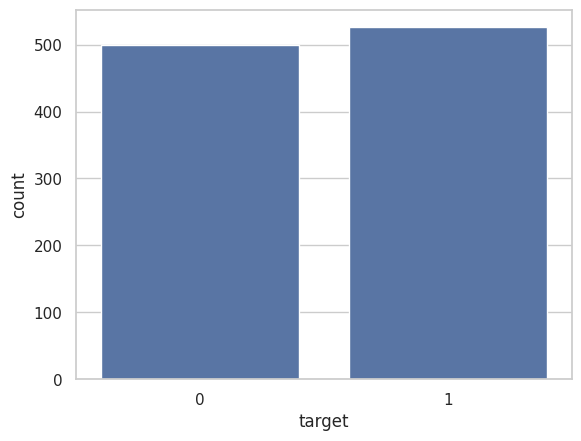

In [74]:
#verificando si los datos obajetivos están balanceados
sns.countplot(x=df_data.target)
plt.show()

In [75]:
#balanceo de valores
undersample = RandomUnderSampler(random_state=42)

In [76]:
X = df_data.drop('target', axis=1)
y = df_data.target

In [77]:
X_over, y_over = undersample.fit_resample(X, y)

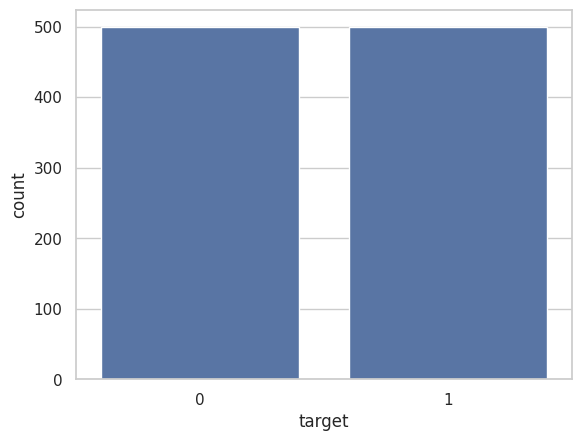

In [78]:
#confirmando el balance de los valores
sns.countplot(x=y_over)
plt.show()

In [79]:
#Realizando las correlaciones 
df_dea = X_over.copy(deep=True)
df_dea['target'] = y_over

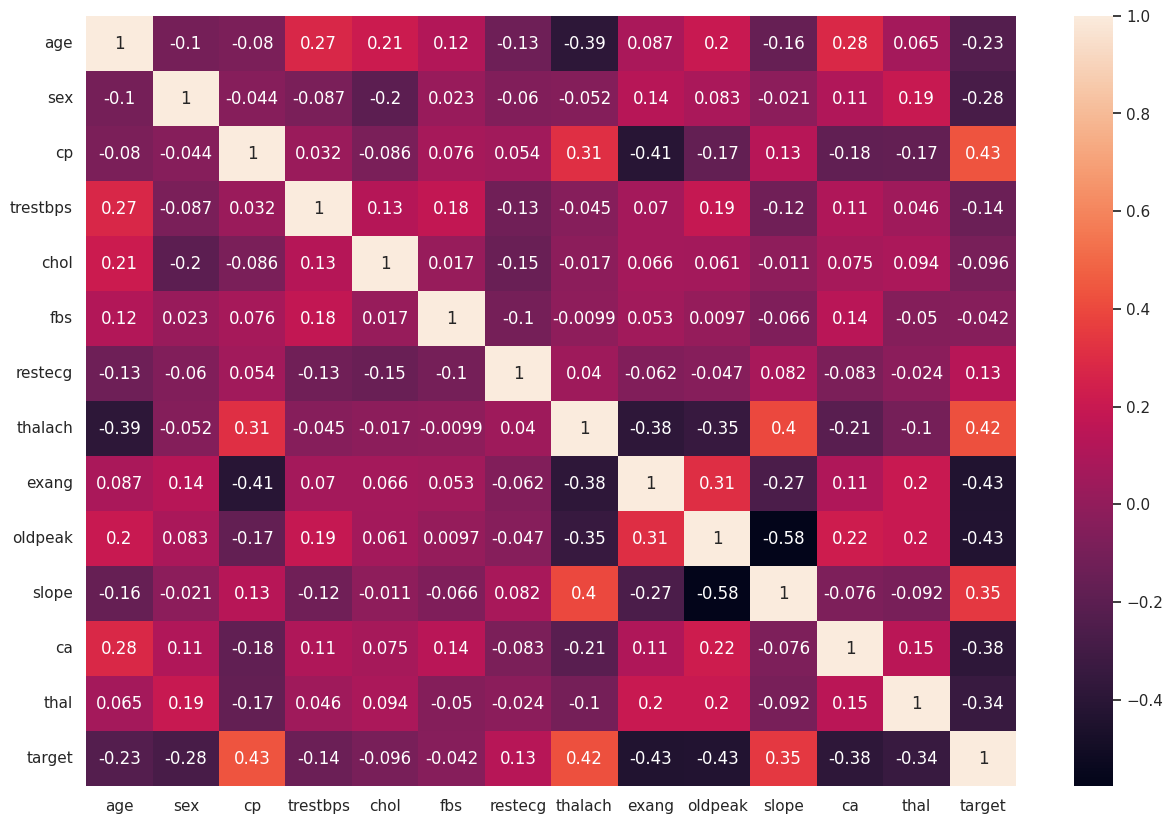

In [80]:
#tabla de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

In [81]:
#escalamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [82]:
st_x = MinMaxScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [83]:
model = LogisticRegression()

In [84]:
#seleccionando el mejor modelo con GridSearchCV
warnings.filterwarnings('ignore')
parameters ={
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinominal']
}

clf = GridSearchCV(
    model, param_grid=parameters, scoring='accuracy', cv=10
)

In [85]:
model = clf.fit(X_train, y_train)

In [86]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[123  32]
 [ 21 124]]
0.8233333333333334


In [87]:
#comprobando con una predicción
model.predict(X.loc[[15]])

array([1])